<img src="https://lh3.googleusercontent.com/drive-viewer/AJc5JmT3-KppjOXJ81Wj6MqcvqmKe2VbLzFP2fJRaXQSvPXxO4JfPi9jrca4-m6yfYWEYZm38rE0M30=w3584-h1706" ><br>





# PROYECTO FINAL - SEGUNDA ENTREGA - MODELO 3

Integrantes:

Juan Sebastian Alvarez Eraso

Rafael Camilo Tejon Rojas

Oscar Javier Angel Balcázar

**Objetivos**

- Finalizar las actividades de entendimiento de los datos y enfoque analítico así como el alcance general del proyecto.
- Realizar la preparación de datos requerida para la construcción de un modelo basado en machine learning.
- Entrenar un primer modelo de machine learning a partir del enfoque analítico
definido y realizar una primera evaluación de resultados.

**Segundo Sprint del proyecto**

● El proyecto se debe enfocar en la preparación de datos y construcción
de un primer modelo predictivo o explicativo basado en regresión, clasificación o alguna otra técnica analítica previamente discutida con los docentes. 



#### **Problemática seleccionada**

Después de una investigación en diferentes temáticas seleccionamos un Dataset con datos de hurtos de la ciudad de Medellín.

**Descripción del Dataset**

Para este taller se utilizarán el siguiente Dataset:


1. Hurto registrados por la Policía Nacional en la ciudad de Medellín<sup>1</sup> cometidos contra personas en espacio público.

 **Diccionario de Datos:**


| Nombre | Tipo |Descripción |
|--------|------|------------|
| SEXO | string  | sexo de la víctima, o cuando lo que se mide es la comisión de un delito del presunto indiciado.|
| EDAD | number |	edad de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado.|
| ESTADO_CIVIL | string  | estado civil de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado.|
| GRUPO_ACTOR | string  | de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado. El grupo actor indica el grupo ej. Guerrilla, Paramilitares etc.|
| ACTIVIDAD_DELICTIVA | string  | actividad ilegal a la que se dedica la víctima o el presunto indiciado. Mirar en contexto con conducta.|
| PARENTESCO | string  | parentesco entre la víctima y el presunto indiciado.|
| OCUPACION | string  | ocupación de la víctima o del presunto indiciado, Mirar en contexto con conducta.|
| DISCAPACIDAD | string  | condición de movilidad reducida de la víctima o indiciado.|
| GRUPO_ESPECIAL | string  | indica grupos especiales, que están asociados de por vida a la persona y que hacen que sean más vulnerables a un hecho en particular.|
| MEDIO_TRANSPORTE | string  | medio transporte donde se movilizaba la víctima o el presunto indiciado según el caso.|
| NIVEL_ACADEMICO | string  | nivel acádemico de la víctima o el presunto indiciado según el caso.|
| TESTIGO | string  | indica si hubo o no un testigo de los hechos.|
| NOMBRE_BARRIO | string  | nombre del barrio donde ocurrieron los hechos.|
| CODIGO_BARRIO | string  | código del barrio donde ocurrieron los hechos.|
| CODIGO_COMUNA | string  | código de la comuna donde ocurrieron los hechos.|
| LUGAR | string  | lugar donde ocurrieron los hechos. El lugar es una tipificación del urbanismo más cercano al hecho.|
| SEDE_RECEPTORA | string  | entidad que recepcionó el caso.|
| CONDUCTA | string  | es el inventario de indicadores o hechos asociados a la seguridad y convivencia.|
| MODALIDAD | string  | es la forma como se materializa el hecho.|
| CARACTERIZACION | string  | variable que permite analizar y tipificar la conducta.|
| CONDUCTA_ESPECIAL | string  | una forma de caracterización adicional.|
| ARMA_MEDIO | string  | es el arma, medio o mecanísmo con el que se comete el hecho.|
| ARTICULO_PENAL | string  | artículos del código penal o del código de contravenciones de Policía.|
| CATEGORIA_PENAL | string  | caracterización de algunos tipos penales.|
| BIEN | string  | nombre del bien.|
| CATEGORIA_BIEN | string  | agrupación de bienes, nivel intermedio de agregación.|
| GRUPO_BIEN | string  | agrupación de bienes, nivel alto de agregación.|
| MODELO | string  | modelo del bien.|
| COLOR | string  | color del bien.|
| PERMISO | string  | tipo de permiso de porte que tiene el bien.|
| UNIDAD_MEDIDA | string  | unidad del bien.|
| FECHA_HECHO	| date | fecha en que ocurrió el hecho.|
| LATITUD	| number |	latitud geográfica sistema de coordenadas wgs84	|
| LONGITUD | number |	longitud geográfica sistema de coordenadas wgs84	|
| CASO | number |	1: indicará el caso, 0: podría indicar bienes o persona, dependiendo de la conducta que se busca analizar, es decir si el hecho es contra la vida y la integridad personal o es contra el patrimonio.|
| VALOR | number |	valor de uso del bien.|
| CANTIDAD | number |	cantidad que debe ser entendida en el contexto de la unidad de medida.|

#### **Lectura y Análisis del Dataset.**

##### Importar librerías

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import pandas as pd
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import calendar

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
# Configuración de pandas para extender el número de filas y columnas en la visualización
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

##### Lectura del Dataset

In [ ]:
# Loading the CSV file as dataframe
med_hurto_df = pd.read_csv('https://raw.githubusercontent.com/juanalvarez123/MINE-4101-proyecto-final/main/data/hurto_a_persona_medellin.csv', delimiter=";", error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
med_hurto_df.shape

(280870, 31)


***Tipos de Variables***


| Nombre | Tipo de Variable|
|--------|---------|
| SEXO | Cualitativa Nominal|
| EDAD | Cuantitativa Continua  |
| ESTADO_CIVIL | Cualitativa Nominal |
| GRUPO_ACTOR | Cualitativa Nominal|
| ACTIVIDAD_DELICTIVA | Cualitativa Nominal|
| PARENTESCO | Cualitativa Nominal|
| OCUPACION | Cualitativa Nominal|
| DISCAPACIDAD | Cualitativa Nominal|
| GRUPO_ESPECIAL | Cualitativa Nominal|
| MEDIO_TRANSPORTE | Cualitativa Nominal|
| NIVEL_ACADEMICO | Cualitativa Ordinal|
| TESTIGO | Cualitativa Nominal|
| NOMBRE_BARRIO | Cualitativa Nominal|
| CODIGO_BARRIO | Cualitativa Nominal|
| CODIGO_COMUNA | Cualitativa Ordinal|
| LUGAR | Cualitativa Nominal|
| SEDE_RECEPTORA | Cualitativa Nominal|
| CONDUCTA | Cualitativa Nominal|
| MODALIDAD | Cualitativa Nominal|
| CARACTERIZACION | Cualitativa Nominal|
| CONDUCTA_ESPECIAL | Cualitativa Nominal|
| ARMA_MEDIO | Cualitativa Nominal|
| ARTICULO_PENAL | Cualitativa Nominal|
| CATEGORIA_PENAL | Cualitativa Nominal|
| BIEN | Cualitativa Nominal|
| CATEGORIA_BIEN | Cualitativa Nominal|
| GRUPO_BIEN | Cualitativa Nominal|
| MODELO | Cualitativa Nominal|
| COLOR | Cualitativa Nominal|
| PERMISO | Cualitativa Nominal|
| UNIDAD_MEDIDA | Cualitativa Nominal|
| FECHA_HECHO	| Cualitativa Ordinal|
| LATITUD	| Cuantitativa Continua|
| LONGITUD	| Cuantitativa Continua|
| CASO | Cualitativa Nominal|
| VALOR | Cualitativa Ordinal|
| CANTIDAD | Cualitativa Ordinal|

# ***Limpieza de Datos***

A continuación se eliminarán las variables nulas del dataframe o columnas que tienen un unico valor constante como la cantidad de objetos hurtados que siempre es uno dentro del archivo.

In [ ]:
med_hurto_df = med_hurto_df.drop(['cantidad','parentesco','nivel_academico','testigo','conducta','caracterizacion','modelo','grupo_bien'], axis=1)
med_hurto_df = med_hurto_df.drop(['articulo_penal','categoria_penal','permiso','unidad_medida','fecha_ingestion','color'], axis=1)
med_hurto_df.shape

(280870, 17)

Se cambia el tipo de dato de la columna "codigo_columna" a string ya que algunos datos los toma como númericos y otros cómo cadena de texto siendo los mismos 

In [ ]:
med_hurto_df['codigo_comuna'] = med_hurto_df['codigo_comuna'].astype(str)
comunas = med_hurto_df.codigo_comuna.unique()
comunas

array(['9', '4', '3', '13', '10', '11', '5', '6', '2', '16', '14', '8',
       '7', '12', '1', '15', 'SIN DATO', '90', '80', '70', '60', '50'],
      dtype=object)

In [ ]:
modalidades = med_hurto_df.modalidad.unique()
modalidades

array(['Descuido', 'Raponazo', 'Atraco', 'Cosquilleo',
       'Clonación de tarjeta', 'Engaño', 'Retención de dinero',
       'Rompimiento de ventana', 'Informático', 'Escopolamina',
       'Sin dato', 'Suplantación', 'Llamada millonaria',
       'Retención de tarjeta', 'Paquete chileno', 'Abuso de confianza',
       'Halado', 'Simulando necesidad', 'Rompimiento cerraduta',
       'Comisión de delito', 'Llave maestra', 'Fleteo', 'Clásica',
       'Tóxico o agente químico', 'Violencia intrafamiliar',
       'Enfrentamiento con la fuerza pública', 'Miedo o terror',
       'Vandalismo', 'Forcejeo', 'Auto robo'], dtype=object)

Se transformaron a minúsculas todas las columnas para evitar tener algunos barrios/localidades en mayúsculas y minúsculas y obtener datos errados en otra posible categoría.

In [ ]:
med_hurto_df['codigo_comuna'] = med_hurto_df['codigo_comuna'].str.lower()
med_hurto_df['codigo_comuna'] = med_hurto_df['codigo_comuna'].str.strip()
med_hurto_df['sexo'] = med_hurto_df['sexo'].str.lower()
med_hurto_df['sexo'] = med_hurto_df['sexo'].str.strip()
med_hurto_df['estado_civil'] = med_hurto_df['estado_civil'].str.lower()
med_hurto_df['estado_civil'] = med_hurto_df['estado_civil'].str.strip()
med_hurto_df['nombre_barrio'] = med_hurto_df['nombre_barrio'].str.lower()
med_hurto_df['nombre_barrio'] = med_hurto_df['nombre_barrio'].str.strip()
med_hurto_df['arma_medio'] = med_hurto_df['arma_medio'].str.lower()
med_hurto_df['arma_medio'] = med_hurto_df['arma_medio'].str.strip()
med_hurto_df['medio_transporte'] = med_hurto_df['medio_transporte'].str.lower()
med_hurto_df['medio_transporte'] = med_hurto_df['medio_transporte'].str.strip()
med_hurto_df['modalidad'] = med_hurto_df['modalidad'].str.lower()
med_hurto_df['modalidad'] = med_hurto_df['modalidad'].str.strip()
med_hurto_df['codigo_barrio'] = med_hurto_df['codigo_barrio'].str.lower()
med_hurto_df['codigo_barrio'] = med_hurto_df['codigo_barrio'].str.strip()
med_hurto_df['lugar'] = med_hurto_df['lugar'].str.lower()
med_hurto_df['lugar'] = med_hurto_df['lugar'].str.strip()
med_hurto_df['bien'] = med_hurto_df['bien'].str.lower()
med_hurto_df['bien'] = med_hurto_df['bien'].str.strip()
med_hurto_df['categoria_bien'] = med_hurto_df['categoria_bien'].str.lower()
med_hurto_df['categoria_bien'] = med_hurto_df['categoria_bien'].str.strip()
med_hurto_df['bien'] = med_hurto_df['bien'].replace('peso','efectivo')

# ****Preparación de los datos****

In [ ]:
# Se estadarizan las cadenas que tenemos como fechas para poder transformarlas correctamente
med_hurto_df['fecha_hecho'] = pd.to_datetime(med_hurto_df['fecha_hecho'], format='%Y-%m-%d')
med_hurto_df['fecha_hecho'] = med_hurto_df['fecha_hecho'].dt.floor('d')
med_hurto_df['dia_semana'] = med_hurto_df['fecha_hecho'].dt.dayofweek
med_hurto_df['num_mes'] = med_hurto_df['fecha_hecho'].dt.month

In [ ]:
med_hurto_df

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,dia_semana,num_mes
0,2012-01-01 00:00:00-05:00,6.231.846,-75.553.096,hombre,32,soltero(a),automóvil,descuido,Sin dato,no,cataluña,#0909,9,vía pública,Villa Hermosa,efectivo,"dinero, joyas, piedras preciosas y título valor",6,1
1,2012-01-01 00:00:00-05:00,6.240.398,-75.553.902,hombre,22,soltero(a),sin dato,raponazo,Sin dato,no,buenos aires,#0907,9,vía pública,Villa Hermosa,accesorios prendas de vestir,prendas de vestir y accesorios,6,1
2,2012-01-01 00:00:00-05:00,6.283.231,-75.563.025,hombre,30,soltero(a),caminata,atraco,Sin dato,arma de fuego,aranjuez,#0413,4,vía pública,Aranjuez,billetera,prendas de vestir y accesorios,6,1
3,2012-01-01 00:00:00-05:00,6.266.206,-75.552.739,hombre,22,soltero(a),motocicleta,descuido,Sin dato,no,manrique central no.2,#0307,3,parqueadero,Manrique,autopartes,autoparte y elementos de la mecánica automotriz,6,1
4,2012-01-01 00:00:00-05:00,6.248.981,-75.621.441,hombre,29,soltero(a),caminata,descuido,Sin dato,no,las independencias,#1314,13,residencia,San Javier,cédula,documentos,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280865,2011-12-31 00:00:00-05:00,6.245.562,-75.567.177,mujer,28,soltero(a),caminata,atraco,De celular,arma cortopunzante,barrio colón,#1013,10,vía pública,Candelaria,celular,tecnología,5,12
280866,2011-12-31 00:00:00-05:00,6.246.175,-75.565.282,hombre,28,unión marital de hecho,caminata,descuido,De celular,no,la candelaria,#1019,10,vía pública,Candelaria,accesorios prendas de vestir,prendas de vestir y accesorios,5,12
280867,2011-12-31 00:00:00-05:00,6.252.083,-7.556.958,hombre,61,casado(a),caminata,descuido,Sin dato,no,la candelaria,#1019,10,vía pública,Candelaria,efectivo,"dinero, joyas, piedras preciosas y título valor",5,12
280868,2011-12-31 00:00:00-05:00,6.246.175,-75.565.282,hombre,28,unión marital de hecho,caminata,descuido,De celular,no,la candelaria,#1019,10,vía pública,Candelaria,celular,tecnología,5,12


In [ ]:
# Se elimina el '#' del código del barrio
med_hurto_df['codigo_barrio'] = med_hurto_df['codigo_barrio'].apply(lambda x: x.replace('#', ''))

In [ ]:
# Se realiza clasificación de Hurtos
# Se define una lista de las modalidades que se considerarpon como peligrosas a pàrtir de esta se agrega una nueva columna en el dataframe.
modalidades_peligrosas = ['atraco', 'rompimiento de ventana', 'escopolamina', 'fleteo', 'tóxico o agente químico', 'miedo o terror', 'vandalismo', 'forcejeo', 'halado', 'rompimiento cerraduta']

def tipo_modalidad(modalidad):
  ndx = -1
  try:
    ndx = modalidades_peligrosas.index(modalidad)
  except:
    ndx = -1
  if ndx>=0:
    return 'Hurto Peligroso' # Las modalidades peligrosas 
  else:
    return 'Hurto NO Peligroso' # Las modalidades NO peligrosas 

med_hurto_df['tipo_modalidad'] = med_hurto_df.apply(lambda x: tipo_modalidad(x.modalidad), axis=1)

In [ ]:
# Clasificación Tipo de transporte
# Se define una lista con los tipos de transporte y estos son agregados a una nueva columna en el dataframe.
tipos_transporte = {'taxi': 'Publico', 'autobus': 'Publico', 'metro': 'Publico', 'automóvil': 'Particular', 'motocicleta': 'Particular', 'motocicleta con parrillero': 'Particular', 'bicicleta': 'Particular', 'caminata': 'Particular'}

def tipo_transporte(tipo):
  ndx = -1
  try:
    return tipos_transporte[tipo]
  except:
    return 'Via Publica'

med_hurto_df['tipo_medio_transp'] = med_hurto_df.apply(lambda x: tipo_transporte(x.medio_transporte), axis=1)

Se definieron los siguientes grupos de transporte

Grupo 0 : Transporte público

Grupo 1 : Transporte particular.

Grupo 2 : Via pública

In [ ]:
# Clasificación Edades
def gruposEdad(edad):
  if (edad<=14):
    return 0
  elif (edad>=15 and edad<=29):
    return 1
  elif (edad>=30 and edad<=44):
    return 2
  elif (edad>=45 and edad<=59):
    return 3
  elif (edad>=60 and edad<=74):
    return 4
  elif (edad>=75 and edad<=89):
    return 5
  elif (edad>=90 and edad<=104):
    return 6
med_hurto_df['grupo_edad'] = med_hurto_df.apply(lambda x: gruposEdad(x.edad), axis=1)

Se definieron los siguientes grupos de transporte

Grupo 0 : 0 - 14 Años

Grupo 1 : 15 - 29 Años

Grupo 2 : 30 - 44 Años

Grupo 3 : 45 - 59 Años

Grupo 4 : 60 - 74 Años

Grupo 5 : 75 - 89 Años

Grupo 6 : 75 - 104 Años

In [ ]:
# Clasificación Armas 
# Se define una lista de las armas que se consideran como peligrosas a partir de esta se agrega una nueva columna en el dataframe.
tipo_armas = ['arma de fuego', 'objeto contundente', 'arma cortopunzante', 'escopolamina', 'tóxico o agente químico']

def tipo_modalidad(modalidad):
  ndx = -1
  try:
    ndx = tipo_armas.index(modalidad)
  except:
    ndx = -1
  if ndx>=0:
    return 'Peligrosa' # Armas peligrosas 
  else:
    return 'NO Peligrosa' # Armas NO peligrosas 

med_hurto_df['tipo_arma'] = med_hurto_df.apply(lambda x: tipo_modalidad(x.modalidad), axis=1)

Se definieron los siguientes grupos de armas:

Grupo 0 : Armas peligrosas

Grupo 1 : Armas NO peligrosas

In [ ]:
med_hurto_df

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,dia_semana,num_mes,tipo_modalidad,tipo_medio_transp,grupo_edad,tipo_arma
0,2012-01-01 00:00:00-05:00,6.231.846,-75.553.096,hombre,32,soltero(a),automóvil,descuido,Sin dato,no,cataluña,0909,9,vía pública,Villa Hermosa,efectivo,"dinero, joyas, piedras preciosas y título valor",6,1,Hurto NO Peligroso,Particular,2,NO Peligrosa
1,2012-01-01 00:00:00-05:00,6.240.398,-75.553.902,hombre,22,soltero(a),sin dato,raponazo,Sin dato,no,buenos aires,0907,9,vía pública,Villa Hermosa,accesorios prendas de vestir,prendas de vestir y accesorios,6,1,Hurto NO Peligroso,Via Publica,1,NO Peligrosa
2,2012-01-01 00:00:00-05:00,6.283.231,-75.563.025,hombre,30,soltero(a),caminata,atraco,Sin dato,arma de fuego,aranjuez,0413,4,vía pública,Aranjuez,billetera,prendas de vestir y accesorios,6,1,Hurto Peligroso,Particular,2,NO Peligrosa
3,2012-01-01 00:00:00-05:00,6.266.206,-75.552.739,hombre,22,soltero(a),motocicleta,descuido,Sin dato,no,manrique central no.2,0307,3,parqueadero,Manrique,autopartes,autoparte y elementos de la mecánica automotriz,6,1,Hurto NO Peligroso,Particular,1,NO Peligrosa
4,2012-01-01 00:00:00-05:00,6.248.981,-75.621.441,hombre,29,soltero(a),caminata,descuido,Sin dato,no,las independencias,1314,13,residencia,San Javier,cédula,documentos,6,1,Hurto NO Peligroso,Particular,1,NO Peligrosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280865,2011-12-31 00:00:00-05:00,6.245.562,-75.567.177,mujer,28,soltero(a),caminata,atraco,De celular,arma cortopunzante,barrio colón,1013,10,vía pública,Candelaria,celular,tecnología,5,12,Hurto Peligroso,Particular,1,NO Peligrosa
280866,2011-12-31 00:00:00-05:00,6.246.175,-75.565.282,hombre,28,unión marital de hecho,caminata,descuido,De celular,no,la candelaria,1019,10,vía pública,Candelaria,accesorios prendas de vestir,prendas de vestir y accesorios,5,12,Hurto NO Peligroso,Particular,1,NO Peligrosa
280867,2011-12-31 00:00:00-05:00,6.252.083,-7.556.958,hombre,61,casado(a),caminata,descuido,Sin dato,no,la candelaria,1019,10,vía pública,Candelaria,efectivo,"dinero, joyas, piedras preciosas y título valor",5,12,Hurto NO Peligroso,Particular,4,NO Peligrosa
280868,2011-12-31 00:00:00-05:00,6.246.175,-75.565.282,hombre,28,unión marital de hecho,caminata,descuido,De celular,no,la candelaria,1019,10,vía pública,Candelaria,celular,tecnología,5,12,Hurto NO Peligroso,Particular,1,NO Peligrosa


In [ ]:
tipo_mod_hurtos_peligrosos = med_hurto_df[med_hurto_df['tipo_modalidad'].str.strip() == 'Hurto Peligroso'] 
tipo_mod_hurtos_peligrosos = tipo_mod_hurtos_peligrosos.groupby(['codigo_comuna','codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
tipo_mod_hurtos_peligrosos = tipo_mod_hurtos_peligrosos.reset_index(name='tipo_mod_hurtos_peligrosos')
tipo_mod_hurtos_peligrosos.tipo_mod_hurtos_peligrosos = MinMaxScaler().fit_transform(np.log10(tipo_mod_hurtos_peligrosos['tipo_mod_hurtos_peligrosos'].values.reshape(-1, 1)))
tipo_mod_hurtos_peligrosos.tipo_mod_hurtos_peligrosos  = np.ceil(tipo_mod_hurtos_peligrosos.tipo_mod_hurtos_peligrosos * 5)
tipo_mod_hurtos_peligrosos

,codigo_comuna,codigo_barrio,tipo_mod_hurtos_peligrosos
0,10,1019,5.0
1,10,1013,5.0
2,10,1001,5.0
3,10,1018,5.0
4,10,1006,5.0
...,...,...,...
328,80,sin dato 80 san antonio de prado,1.0
329,50,5008,1.0
330,10,sin dato 10 la candelaria,1.0
331,50,5001,0.0


In [ ]:
tipo_mod_hurtos_no_peligrosos = med_hurto_df[med_hurto_df['tipo_modalidad'].str.strip() == 'Hurto NO Peligroso'] 
tipo_mod_hurtos_no_peligrosos = tipo_mod_hurtos_no_peligrosos.groupby(['codigo_comuna','codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
tipo_mod_hurtos_no_peligrosos = tipo_mod_hurtos_no_peligrosos.reset_index(name='tipo_mod_hurtos_no_peligrosos')
tipo_mod_hurtos_no_peligrosos.tipo_mod_hurtos_no_peligrosos = MinMaxScaler().fit_transform(np.log10(tipo_mod_hurtos_no_peligrosos['tipo_mod_hurtos_no_peligrosos'].values.reshape(-1, 1)))
tipo_mod_hurtos_no_peligrosos.tipo_mod_hurtos_no_peligrosos  = np.ceil(tipo_mod_hurtos_no_peligrosos.tipo_mod_hurtos_no_peligrosos * 5)
tipo_mod_hurtos_no_peligrosos

,codigo_comuna,codigo_barrio,tipo_mod_hurtos_no_peligrosos
0,10,1019,5.0
1,14,1418,5.0
2,10,1007,5.0
3,10,1013,5.0
4,10,1006,4.0
...,...,...,...
325,50,5005,1.0
326,10,sin dato 10 la candelaria,0.0
327,50,5007,0.0
328,50,5006,0.0


In [ ]:
def clasificador_barrios(hurtos):
  if hurtos > 10:
    return 3
  elif hurtos > 1:
    return 2 
  else:
    return 1

In [ ]:
med_hurtos_groups_init = med_hurto_df.groupby(['codigo_comuna','codigo_barrio','fecha_hecho'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
med_hurtos_groups_init = med_hurtos_groups_init.reset_index(name='hurtos')
med_hurtos_groups_init.hurtos = med_hurtos_groups_init.hurtos.apply(clasificador_barrios)
med_hurtos_groups_init

,codigo_comuna,codigo_barrio,fecha_hecho,hurtos
0,11,1107,2019-08-06 00:00:00-05:00,3
1,4,inst_9,2019-11-11 00:00:00-05:00,3
2,10,1019,2019-12-30 00:00:00-05:00,3
3,10,1019,2019-12-21 00:00:00-05:00,3
4,10,1019,2020-10-28 00:00:00-05:00,3
...,...,...,...,...
127146,14,1409,2021-06-19 00:00:00-05:00,1
127147,15,1507,2021-06-19 00:00:00-05:00,1
127148,5,0514,2021-06-19 00:00:00-05:00,1
127149,11,1105,2021-06-19 00:00:00-05:00,1


In [ ]:
med_hurtos_groups = pd.merge(med_hurtos_groups_init, tipo_mod_hurtos_peligrosos, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups.tipo_mod_hurtos_peligrosos  = med_hurtos_groups.tipo_mod_hurtos_peligrosos.fillna(-1)
med_hurtos_groups = pd.merge(med_hurtos_groups, tipo_mod_hurtos_no_peligrosos, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups.tipo_mod_hurtos_no_peligrosos  = med_hurtos_groups.tipo_mod_hurtos_no_peligrosos.fillna(-1)
med_hurtos_groups['month'] = med_hurtos_groups['fecha_hecho'].dt.month
med_hurtos_groups['month'] = med_hurtos_groups['month'].apply(lambda x : calendar.month_abbr[x])
med_hurtos_groups['dayofweek'] = med_hurtos_groups['fecha_hecho'].dt.dayofweek
med_hurtos_groups['dayofweek'] = med_hurtos_groups['dayofweek'].apply(lambda x : calendar.day_abbr[x])

med_hurtos_groups

,codigo_comuna,codigo_barrio,fecha_hecho,hurtos,tipo_mod_hurtos_peligrosos,tipo_mod_hurtos_no_peligrosos,month,dayofweek
0,11,1107,2019-08-06 00:00:00-05:00,3,4.0,4.0,Aug,Tue
1,4,inst_9,2019-11-11 00:00:00-05:00,3,4.0,4.0,Nov,Mon
2,10,1019,2019-12-30 00:00:00-05:00,3,5.0,5.0,Dec,Mon
3,10,1019,2019-12-21 00:00:00-05:00,3,5.0,5.0,Dec,Sat
4,10,1019,2020-10-28 00:00:00-05:00,3,5.0,5.0,Oct,Wed
...,...,...,...,...,...,...,...,...
127146,14,1409,2021-06-19 00:00:00-05:00,1,4.0,3.0,Jun,Sat
127147,15,1507,2021-06-19 00:00:00-05:00,1,4.0,4.0,Jun,Sat
127148,5,0514,2021-06-19 00:00:00-05:00,1,4.0,3.0,Jun,Sat
127149,11,1105,2021-06-19 00:00:00-05:00,1,5.0,4.0,Jun,Sat


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(med_hurtos_groups['dayofweek'].values.reshape(-1,1))
print(list(enc.categories_[0]))
day_of_week_enc = enc.transform(med_hurtos_groups['dayofweek'].values.reshape(-1,1)).toarray()

['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']


In [ ]:
df = pd.DataFrame(day_of_week_enc, 
             columns=list(enc.categories_[0]))
df
med_hurtos_groups = med_hurtos_groups.join(df)
med_hurtos_groups = med_hurtos_groups.drop(columns = ['dayofweek'])
med_hurtos_groups

,codigo_comuna,codigo_barrio,fecha_hecho,hurtos,tipo_mod_hurtos_peligrosos,tipo_mod_hurtos_no_peligrosos,month,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,11,1107,2019-08-06 00:00:00-05:00,3,4.0,4.0,Aug,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,inst_9,2019-11-11 00:00:00-05:00,3,4.0,4.0,Nov,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10,1019,2019-12-30 00:00:00-05:00,3,5.0,5.0,Dec,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10,1019,2019-12-21 00:00:00-05:00,3,5.0,5.0,Dec,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10,1019,2020-10-28 00:00:00-05:00,3,5.0,5.0,Oct,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127146,14,1409,2021-06-19 00:00:00-05:00,1,4.0,3.0,Jun,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127147,15,1507,2021-06-19 00:00:00-05:00,1,4.0,4.0,Jun,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127148,5,0514,2021-06-19 00:00:00-05:00,1,4.0,3.0,Jun,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127149,11,1105,2021-06-19 00:00:00-05:00,1,5.0,4.0,Jun,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(med_hurtos_groups['month'].values.reshape(-1,1))
print(list(enc.categories_[0]))
month_enc = enc.transform(med_hurtos_groups['month'].values.reshape(-1,1)).toarray()

['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']


In [ ]:
df = pd.DataFrame(month_enc, 
             columns=list(enc.categories_[0]))
df
med_hurtos_groups = med_hurtos_groups.join(df)
med_hurtos_groups = med_hurtos_groups.drop(columns = ['month'])
med_hurtos_groups

,codigo_comuna,codigo_barrio,fecha_hecho,hurtos,tipo_mod_hurtos_peligrosos,tipo_mod_hurtos_no_peligrosos,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,11,1107,2019-08-06 00:00:00-05:00,3,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,inst_9,2019-11-11 00:00:00-05:00,3,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10,1019,2019-12-30 00:00:00-05:00,3,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,1019,2019-12-21 00:00:00-05:00,3,5.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,1019,2020-10-28 00:00:00-05:00,3,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127146,14,1409,2021-06-19 00:00:00-05:00,1,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
127147,15,1507,2021-06-19 00:00:00-05:00,1,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
127148,5,0514,2021-06-19 00:00:00-05:00,1,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
127149,11,1105,2021-06-19 00:00:00-05:00,1,5.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
med_hurtos_groups.columns

Index(['codigo_comuna', 'codigo_barrio', 'fecha_hecho', 'hurtos',
       'tipo_mod_hurtos_peligrosos', 'tipo_mod_hurtos_no_peligrosos', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

# ****Selección de Modelos****

## 1. Modelo 1

In [ ]:
features = ['tipo_mod_hurtos_peligrosos', 'tipo_mod_hurtos_no_peligrosos', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

X = med_hurtos_groups[features]
X, X_valid, Y, Y_valid = train_test_split(med_hurtos_groups[features], med_hurtos_groups['hurtos'], test_size = 0.1, random_state = 50)

In [ ]:
parameters = {'max_depth':range(3,15), 'criterion': ['gini', 'entropy']}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X=X, y=Y)
model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5745182938408486 {'criterion': 'entropy', 'max_depth': 6}


In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.28348508, 0.33962882, 0.40914085, 0.46086626, 0.51931651,
        0.57735214, 0.60760267, 0.63207371, 0.68375309, 0.67664545,
        0.72429488, 0.74576933, 0.23988984, 0.33727911, 0.39339814,
        0.46266947, 0.50251083, 0.55717134, 0.60431454, 0.65660152,
        0.67109246, 0.68317075, 0.73234596, 0.67969477]),
 'std_fit_time': array([0.03476199, 0.05202807, 0.04926157, 0.05579859, 0.06041312,
        0.02846098, 0.07494519, 0.0506179 , 0.04453138, 0.05539464,
        0.04299083, 0.0384122 , 0.04582829, 0.05136601, 0.04970627,
        0.05489406, 0.04314719, 0.07343699, 0.07351945, 0.04152625,
        0.04408987, 0.05957906, 0.02416795, 0.13133488]),
 'mean_score_time': array([0.0125315 , 0.00891495, 0.0117682 , 0.01088774, 0.01203456,
        0.01121297, 0.01296046, 0.01363614, 0.01401992, 0.01311605,
        0.01539633, 0.01355762, 0.01288884, 0.01380296, 0.01186383,
        0.01016278, 0.0126426 , 0.01163535, 0.01552665, 0.01179593,
        0.011563

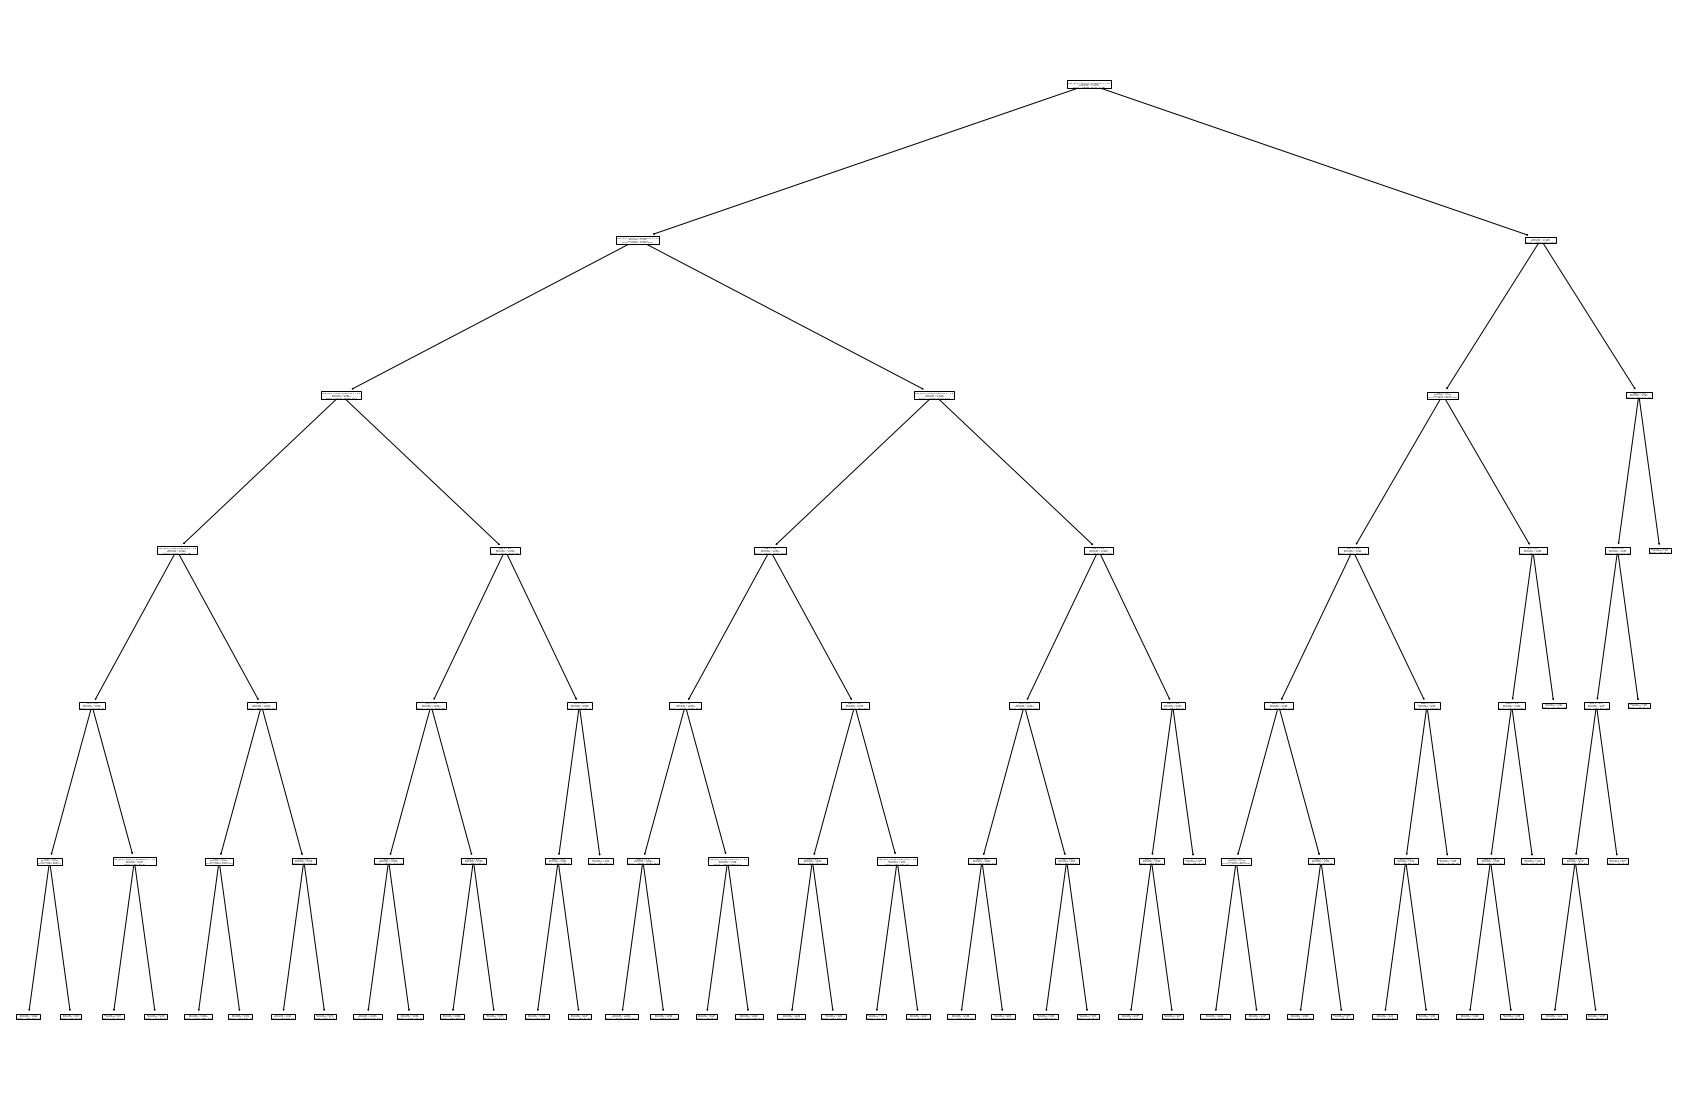

In [ ]:
plt.figure(figsize = (30, 20))
plot_tree(model, feature_names = model.feature_names_in_)
plt.show()

### Evaluating the model

In [ ]:
predictions = model.predict(X_valid)

# ****Evaluación del Modelo****

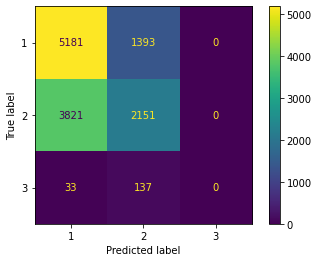

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.5765964139666562
Recall: 0.5765964139666562
F1: 0.5765964139666562


# Random Forest

In [ ]:
parameters = {'max_depth':range(10,15), 'criterion': ['gini', 'entropy'], 'n_estimators': range(50, 150, 10)}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X=X, y=Y)
model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5749203153432284 {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 110}


In [ ]:
clf.cv_results_

{'mean_fit_time': array([ 7.38105376,  9.0968421 , 10.85485854, 11.65394597, 12.98417847,
        14.95473578, 15.93893502, 17.36377008, 19.24260769, 20.89061496,
         7.73387699,  9.62047272, 10.93663235, 12.17693906, 14.24163737,
        15.19321854, 16.75440726, 18.19056427, 20.29016771, 21.58301628,
         7.93914292,  9.62535164, 11.54646618, 12.80471661, 14.1455333 ,
        15.94825096, 17.69799938, 20.60572135, 21.46076474, 22.52646933,
         9.03113651, 10.31054871, 11.70772223, 14.08166647, 15.52188358,
        17.51816056, 19.12422268, 20.82359362, 23.17693276, 23.98456724,
         8.85362837, 10.9147104 , 12.37225475, 14.64349377, 16.16201715,
        17.64571671, 19.68822775, 21.60484173, 23.99530077, 25.33760672,
         7.93352017,  8.78291671, 10.90062547, 12.52142456, 13.84129319,
        15.57286248, 16.4913064 , 18.0559617 , 19.86631958, 21.15758054,
         8.04533532,  9.15965128, 11.09962931, 12.73923786, 14.86979563,
        16.15713332, 17.68719244, 

### Evaluating the model

In [ ]:
predictions = model.predict(X_valid)

# ****Evaluación del Modelo****

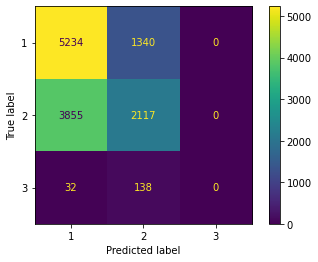

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.5780905945265807
Recall: 0.5780905945265807
F1: 0.5780905945265807


# ****Conclusión del Modelo****

Se puede concluir que el mejor modelo es el Random Forest aunque a decir verdad no existe una gran diferencia entre todos los modelos que se probaron. Además, se puede observar en la matriz de confusión que ningún modelo aprende a predecir barrios de categoría 3.


### Bibliografía

<sup>1</sup> Hurto a persona - Alcaldía de Medellín http://medata.gov.co/dataset/hurto-persona